<img src="kaggle.png">

# Соревнование https://www.kaggle.com/c/property-prices-2

## Пример решения

In [1]:
import numpy
import pandas
import sklearn.ensemble

import xgboost as xgb

In [2]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

UsageError: Line magic function `%install_ext` not found.


In [3]:
train = pandas.read_csv('Train.csv')
#test = pandas.read_csv('Test.csv')

train = train.replace(numpy.nan, -999)
#train = train.dropna(numpy.nan, -999)
#test = test.replace(numpy.nan, -999)

In [4]:
train.dtypes

id              int64
date           object
street_id       int64
build_tech    float64
floor           int64
area            int64
rooms           int64
balcon          int64
metro_dist    float64
g_lift        float64
n_photos        int64
kw1             int64
kw2             int64
kw3             int64
kw4             int64
kw5             int64
kw6             int64
kw7             int64
kw8             int64
kw9             int64
kw10            int64
kw11            int64
kw12            int64
kw13            int64
price           int64
dtype: object

In [5]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

# load data

X_ext = train.drop(('price'), axis=1) 
X_ext = X_ext.drop(('date'), axis=1) 
y_ext = train['price']


# feature extraction

test = SelectKBest(score_func=chi2, k=4)

fit = test.fit(X_ext, y_ext)

# summarize scores

print(fit.scores_)

features = fit.transform(X_ext)

# summarize selected features

for i in range(X_ext.shape[1]):
    print(X_ext.columns[i]);
    print(fit.scores_[i]);
    print('*************************************************************');

ValueError: Input X must be non-negative.

In [6]:
X_ext.shape

(100000, 23)

In [7]:

y_ext.shape

(100000,)

In [8]:
train.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,121,1.0,3,52,2,1,30.0,0.0,...,0,0,0,0,0,0,0,0,0,3090000
1,1,2011-1,58,1.0,6,101,3,1,5.0,-999.0,...,0,0,0,0,0,0,0,0,0,15372000
2,2,2011-1,530,0.0,11,71,3,0,30.0,-999.0,...,0,0,0,0,0,0,0,0,0,10067000
3,3,2011-1,448,-999.0,5,36,1,1,15.0,0.0,...,0,0,0,0,0,0,0,0,0,3159000
4,4,2011-1,404,2.0,3,215,6,2,20.0,1.0,...,0,0,0,0,0,0,0,0,0,13816000


In [9]:
#COLUMNS = ['street_id', 'build_tech', 'floor', 'area', 'rooms', 'balcon', 'metro_dist', 'g_lift', 'n_photos', 'kw1', 'kw2', 'kw3', 'kw4', 'kw5', 'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12', 'kw13']

COLUMNS = ['build_tech', 'floor', 'area', 'rooms', 'balcon', 'metro_dist', 'g_lift']

#train2=train.groupby('area').std()
#test2=region_groupby.aggregate(np.mean)
#train2.drop(u'id')


In [10]:
y = train['price'].values
X = train[COLUMNS].values

In [11]:
from sklearn.model_selection import train_test_split, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [12]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)

In [13]:
#train.describe()

In [14]:
#train.info()

In [15]:
X_train.shape

(80000, 7)

In [16]:
X_test.shape

(20000, 7)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
from sklearn.model_selection import train_test_split, cross_val_predict

In [19]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state=55)

In [20]:
from sklearn import ensemble
import xgboost as xgb


mdl_1 = sklearn.ensemble.RandomForestRegressor(max_features='auto', max_depth=83, n_estimators=42, max_leaf_nodes=10000)
mdl_2 = sklearn.ensemble.RandomForestRegressor(max_depth=83, n_estimators=46)
#mdl_3 = sklearn.ensemble.RandomForestRegressor(criterion='mae')


In [21]:
mdl_4 = sklearn.ensemble.RandomForestRegressor()
mdl_5 = xgb.XGBRegressor(max_depth=12, learning_rate = 0.1)
#mdl_6 = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4)

In [22]:
X_test2.shape

(16000, 7)

In [23]:
y_train2.shape

(64000,)

In [24]:
mdl_1.fit(X_train2, y_train2)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=83,
           max_features='auto', max_leaf_nodes=10000,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=42, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [111]:
mdl_2.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=83,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=46, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [20]:
#mdl_3.fit(X_train, y_train)

In [112]:
mdl_4.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [113]:
mdl_5.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=12, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
#mdl_6.fit(X_train, y_train)

In [25]:
pred_1 = mdl_1.predict(X_test2)

In [114]:
pred_1 = mdl_1.predict(X_test2)
pred_2 = mdl_2.predict(X_test2)
pred_4 = mdl_4.predict(X_test2)
pred_5 = mdl_5.predict(X_test2)


#test['price'] = preds

#test[['id', 'price']].to_csv('sub.csv', index=False)

In [26]:
pred_1

array([ 5878604.6852869 ,  2301704.25630115, 14548072.95918367, ...,
        7049351.53852839,  4844666.35560596,  3578473.23961188])

In [39]:
y_test.shape

(20000,)

## Оценка результатов по MAE

In [117]:
mean_absolute_error(y_pred=pred_1, y_true=y_test2)

1613936.7778345852

In [118]:
mean_absolute_error(y_pred=pred_2, y_true=y_test2)

1593974.0775648076

In [119]:
mean_absolute_error(y_pred=pred_4, y_true=y_test2)

639007.4579960317

In [120]:
mean_absolute_error(y_pred=pred_5, y_true=y_test2)

746498.8202753906

In [27]:
%%time
print('fdsv')

fdsv
Wall time: 0 ns


## Проведем преданализ

In [123]:
# Чтобы посмотреть на каждой глубине дерева
#%%time
metric_2 =[]
for n_trees in range(1,20):
    #mdl = sklearn.ensemble.RandomForestRegressor(max_depth=n_trees)
    mdl_2 = sklearn.ensemble.RandomForestRegressor(max_depth=n_trees, n_estimators=46)
    mdl_2.fit(X_train2, y_train2)
    preds_2 = mdl_2.predict(X_test2)
    metric_2.append(mean_absolute_error(y_pred=preds_2, y_true=y_test2))



In [124]:
metric_2 #RandomForestRegressor ждал долго

[2444797.4976042463,
 2231708.975660294,
 2157206.60804783,
 2084658.3770813365,
 2030466.8096207194,
 1978667.1767929597,
 1943596.0835242213,
 1910817.2374623076,
 1891409.2187991,
 1867247.0447871939,
 1847649.1459434254,
 1826861.4537290453,
 1807538.4434358873,
 1790610.038428564,
 1763991.8108879533,
 1740346.296830451,
 1721702.6249464767,
 1703077.844649828,
 1684063.6542925308]

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
# Чтобы посмотреть на каждой глубине дерева

metric_4 =[]
for n_trees in range(1,20):
    mdl_4 = xgb.XGBRegressor(max_depth = n_trees, learning_rate = 0.1)
    mdl_4.fit(X_train2, y_train2)
    preds = mdl_4.predict(X_test2)
    metric_4.append(mean_absolute_error(y_pred=preds, y_true=y_test2))
    

In [126]:
metric_4

[2065283.216453125,
 1940878.49575,
 1841475.2424921875,
 1745712.8663515626,
 1639268.3604960938,
 1543636.6994257811,
 1428566.8101015624,
 1388658.672814453,
 1283871.8815742189,
 1268621.0125507812,
 1229123.9393945313,
 1182159.989125,
 1218480.527796875,
 1212757.17915625,
 1248774.7446132812,
 1259122.0200585937,
 1266276.317841797,
 1299708.9420742188,
 1316247.5668183593]

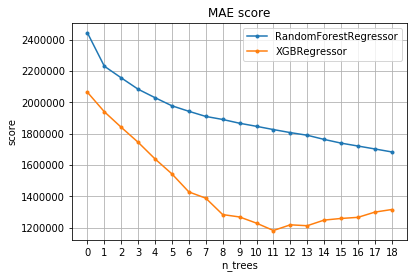

RandomForestRegressor:  1684063.6542925308
XGBRegressor:  1182159.989125


In [127]:
plt.plot(metric_2, marker = '.', label = 'RandomForestRegressor')
plt.plot(metric_4, marker = '.', label = 'XGBRegressor')
plt.grid(True)
plt.xlabel('n_trees')
plt.ylabel('score')
plt.xticks(range(0, 19))
plt.title('MAE score')
plt.legend(loc = 'best')
plt.show()

print('RandomForestRegressor: ', min(metric_2))
print('XGBRegressor: ', min(metric_4))


## Теперь тестовый набор

In [ ]:
y_train, y_test

In [128]:
pred_11 = mdl_1.predict(X_test)
pred_22 = mdl_2.predict(X_test)
pred_44 = mdl_4.predict(X_test)
pred_55 = mdl_5.predict(X_test)

In [129]:
mean_absolute_error(y_pred=pred_11, y_true=y_test)

24687166.278982427

In [130]:
mean_absolute_error(y_pred=pred_22, y_true=y_test)

27332437.751086958

In [131]:
mean_absolute_error(y_pred=pred_44, y_true=y_test)

13429689.8146

In [132]:
mean_absolute_error(y_pred=pred_55, y_true=y_test)

22156245.6603

In [133]:
mdl_44 = xgb.XGBRegressor(max_depth = 11, learning_rate = 0.1)

In [134]:
mdl_44.fit(X_train2, y_train2)
preds_final = mdl_44.predict(X_test)
mean_absolute_error(y_pred=preds_final, y_true=y_test)

10941015.3286